<a href="https://colab.research.google.com/github/Jarayasarabia1/Proyecto-m-dulo-6/blob/main/Modulo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresión Lineal


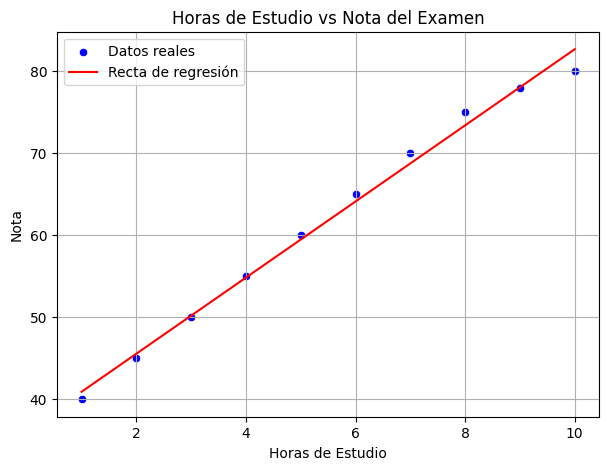

Intercepto (a): 36.266666666666666
Pendiente (b): 4.642424242424243


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1) Datos simulados
horas_estudio = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
notas = np.array([40, 45, 50, 55, 60, 65, 70, 75, 78, 80])

# 2) Modelo de regresión lineal
modelo = LinearRegression()
# Entrenar el modelo
modelo.fit(horas_estudio, notas)

# 3) Predicciones
notas_pred = modelo.predict(horas_estudio)

# 4) Gráfico
plt.figure(figsize=(7,5))
sns.scatterplot(x=horas_estudio.flatten(), y=notas, color="blue", label="Datos reales")
plt.plot(horas_estudio, notas_pred, color="red", label="Recta de regresión")
plt.title("Horas de Estudio vs Nota del Examen")
plt.xlabel("Horas de Estudio")
plt.ylabel("Nota")
plt.legend()
plt.grid(True)
plt.show()

# 5) Coeficientes de Regresión, Resultados del modelo
print("Intercepto (a):", modelo.intercept_)
print("Pendiente (b):", modelo.coef_[0])

##Regresión Polinómica:


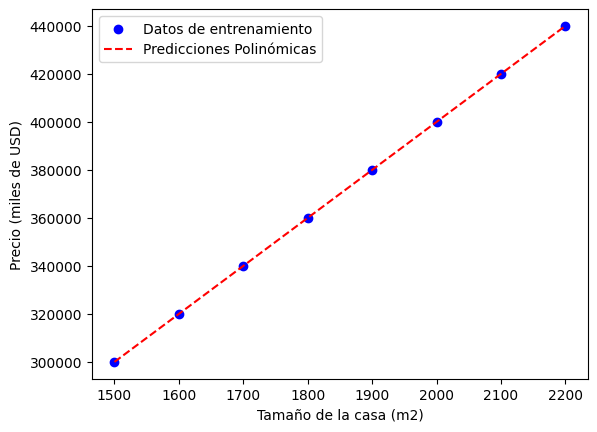

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define X and y using the data dictionary
X = np.array(data['Tamaño']).reshape(-1, 1)
y = np.array(data['Precio'])

# Crear caracteristicas polinómicas
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Ajustar el modelo de regresión polinómica
model =  LinearRegression()
model.fit(X_poly, y)

# Predecir precios para nuevos datos
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # Define X_new
X_new_poly = poly.transform(X_new)
y_pred_poly = model.predict(X_new_poly)

# Visualizar los datos y la curva de regresión polinómica
plt.scatter(X, y, color ="blue", label="Datos de entrenamiento")
plt.plot(X_new, y_pred_poly, color="red", linestyle='--', label='Predicciones Polinómicas')
plt.xlabel('Tamaño de la casa (m2)')
plt.ylabel('Precio (miles de USD)')
plt.legend()
plt.show()

##Método de retención (hold-out method):
En resumen, el método de retención es una herramienta sencilla y eficiente para evaluar modelos,
especialmente en grandes conjuntos de datos, aunque tiene limitaciones en términos de robustez y
uso de datos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Cragar datos
iris = load_iris()
X, y = iris.data, iris.target

#Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = DecisionTreeClassifier()

#Entrenar el modelo
model.fit(X_train, y_train)

#Validar el modelo
y_pred = model.predict(X_val)

#Calcular y mostrar la precisión
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 1.0


In [ ]:
#Importar librerías
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import(
     KFold,
     LeaveOneOut,
     StratifiedKFold,
     ShuffleSplit,
     cross_val_score
)
from sklearn.ensemble import RandomForestClassifier

#Cargar el dataset Iris
data= load_iris()
X = data.data #Características (features)
y = data.target #Etiquetas (labels)

#Configurra K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Evaluar el modelo con K-Fold
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y ,cv=kf)

#Mostrar los resultados
print("Puntaciones de k-Fold Cross-Validation:", scores)
print("Puntación media", np.mean(scores))

#Configurar Leave-One-Out Cross-Validation
loo = LeaveOneOut()

#Evaluar el modelo con LOOCV
scores = cross_val_score(model, X, y, cv=loo)

#Mostrar los resultados
print("Puntaciones de LOOCV", scores)
print("Puntación media:", np.mean(scores))

#Configurar Random Subsampling
rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

#Evaluar el modelo con Random Subsampling
scores = cross_val_score(model, X, y, cv=rs)

#Mostrar los resultados
print("Puntaciones de Random Subsampling:", scores)
print("Puntación media:", np.mean(scores))

#Comparar resultados
print("Comparación de métodos:")
print("k-Fold:", np.mean(cross_val_score(model,X,y, cv=KFold(n_splits=5,shuffle=True, random_state=42) )))
print("LOOCV:", np.mean(cross_val_score(model,X,y, cv=LeaveOneOut() )))
print("Random Subsampling:", np.mean(cross_val_score(model,X,y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=42))))



Puntaciones de k-Fold Cross-Validation: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Puntación media 0.9600000000000002
Puntaciones de LOOCV [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Puntación media: 0.9533333333333334
Puntaciones de Random Subsampling: [1.         0.96666667 0.96666667 0.93333333 0.93333333 1.
 0.9        0.96666667 1.         0.93333333]
Puntación media: 0.96
Comparación de métodos:
k-Fold: 0.9600000000000002
LOOCV: 0.9533333333333334
Random Subsampling: 0.96


##Eliminar nulos y duplicados.

In [ ]:
import pandas as pd
#Dataset con valores nulos y duplicados
data = {'Nombre':['Alice','Bob', 'Charlie', None],
        'Edad':[25, None, 30, 22],
        'Ciudad':['Madrid','Barcelona','Madrid','Madrid']
        }
df = pd.DataFrame(data)
#Identificar valores nulos y duplicados

print(df.isnull().sum())
print(df['Ciudad'].duplicated().sum())

#Eliminar filas con valores nulos
df_cleaned = df.dropna()

#Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates(subset=['Ciudad'])

print(df_cleaned)
print(df)

Nombre    1
Edad      1
Ciudad    0
dtype: int64
2
  Nombre  Edad  Ciudad
0  Alice  25.0  Madrid
    Nombre  Edad     Ciudad
0    Alice  25.0     Madrid
1      Bob   NaN  Barcelona
2  Charlie  30.0     Madrid
3     None  22.0     Madrid


In [ ]:
import pandas as pd
import numpy as np

#  Crear dataset de ejemplo con nulos, duplicados e inconsistencias
data = {
    'Nombre': ['Ana', 'Luis', 'Ana', 'Pedro', None],
    'Edad': [25, np.nan, 30, 22, 40],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'MADRID', 'Barcelona'],
    'Fecha_Registro': ['2021-01-05', '05/02/2021', '2021/03/10', '10-04-2021', None]
}

df = pd.DataFrame(data)

print(" Datos originales:")
print(df)

#  1. Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

#  2. Verificar duplicados
print("\n¿Hay filas duplicadas?:", df.duplicated().any())
print("Número de filas duplicadas:", df.duplicated().sum())

# 1️ Eliminar valores nulos en una columna (ejemplo: Nombre)
df = df.dropna(subset=['Nombre'])

# 2️ Imputación de valores faltantes en "Edad"
df['Edad_media'] = df['Edad'].fillna(df['Edad'].mean())     # Usar media
df['Edad_mediana'] = df['Edad'].fillna(df['Edad'].median()) # Usar mediana
df['Edad_moda'] = df['Edad'].fillna(df['Edad'].mode()[0])   # Usar moda

# 3️ Eliminar duplicados (en base al nombre y ciudad, por ejemplo)
df = df.drop_duplicates(subset=['Nombre','Ciudad'])

# 4️Corrección de inconsistencias en "Ciudad" (pasar todo a minúsculas)
df['Ciudad'] = df['Ciudad'].str.lower()

# 5️Corrección de formato de fechas
df['Fecha_Registro'] = pd.to_datetime(df['Fecha_Registro'], errors='coerce')

print("\n Datos limpios:")
print(df)

 Datos originales:
  Nombre  Edad     Ciudad Fecha_Registro
0    Ana  25.0     Madrid     2021-01-05
1   Luis   NaN  Barcelona     05/02/2021
2    Ana  30.0     Madrid     2021/03/10
3  Pedro  22.0     MADRID     10-04-2021
4   None  40.0  Barcelona           None

Valores nulos por columna:
Nombre            1
Edad              1
Ciudad            0
Fecha_Registro    1
dtype: int64

¿Hay filas duplicadas?: False
Número de filas duplicadas: 0

 Datos limpios:
  Nombre  Edad     Ciudad Fecha_Registro  Edad_media  Edad_mediana  Edad_moda
0    Ana  25.0     madrid     2021-01-05   25.000000          25.0       25.0
1   Luis   NaN  barcelona            NaT   25.666667          25.0       22.0
3  Pedro  22.0     madrid            NaT   22.000000          22.0       22.0


In [ ]:
import pandas as pd
#Identificar duplicados

df = pd.DataFrame({'A':[1,2,2,3],
                   'B':[4,5,5,6]
                  })
print(df.duplicated()) # sale True por que hay un duplicado en la fila, si no existe duplicado en la fila arroga un False pero igual hay duplicados

#Contar los duplicados en una columna específica

df['Nombre'].duplicated().sum()

#Eliminar duplicados, usamos drop_duplicates():

df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados)

#Especifica las columnas a considerar para identificar duplicados
df_sin_dupliacos = df.drop_duplicates(subset=['A'])



0    False
1    False
2     True
3    False
dtype: bool
   A  B
0  1  4
1  2  5
3  3  6


In [ ]:
import pandas as pd

# Lista de fechas en formato string
fechas = ["2021-01-05", "05/02/2021", "2021/03/10", "10-04-2021", "no_es_fecha"]

# Convertir a formato datetime
fechas_convertidas = pd.to_datetime(fechas, errors='coerce')

print(fechas_convertidas)

DatetimeIndex(['2021-01-05', 'NaT', 'NaT', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)


implementacion de técnicas de escalamiento con Scikit-Learn, elegir entre MinMaxScaler, StandardScaler:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Crear un dataset de ejemplo

datos =  np.array([[10,200],[20,300],[30,400],[40,500]])
print("Datos originales:\n", datos)

#Aplicar Min-Max Scaling
minmax_scaler = MinMaxScaler()
datos_minmax = minmax_scaler.fit_transform(datos)
print(datos_minmax)

#Aplicar Standars Scaling
standard_scaler = StandardScaler()
datos_standard = standard_scaler.fit_transform(datos)
print('Standard Scaling:\n', datos_standard)

Datos originales:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]
Standard Scaling:
 [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


##Regresión Lineal (LinearRegression):

Descripción: Es el modelo más básico y común para problemas de regresión lineal. Ajusta una línea recta (o un hiperplano en múltiples dimensiones) a los datos de entrenamiento.

Uso: Ideal para problemas donde la relación entre las variables de entrada y la variable de salida es lineal.

In [ ]:
# 1. Importar bibliotecas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Crear datos de ejemplo
# Variable X (tiempo, tamaño, etc.) y Y (población, valor, etc.)
np.random.seed(42)
X = np.random.rand(100, 1) * 10        # 100 valores aleatorios entre 0 y 10
y = 3 * X.flatten() + 7 + np.random.randn(100) * 2  # y = 3x + 7 + ruido

# 3. Dividir datos en entrenamiento y prueba #train_test_split() la función sirve para dividir los datos en dos partes, train= datos para entrenar el modelo, test=Datos para probar o validar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Crear el modelo
model = LinearRegression()
#Entrenar el modelo
model.fit(X_train, y_train)

# 5. Predecir con el modelo #Aplicar lo aprendido a datos nuevos para estimar los resultados.
y_pred = model.predict(X_test)

# 6. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación R²: {r2:.3f}")

Error cuadrático medio (MSE): 2.61
Coeficiente de determinación R²: 0.969


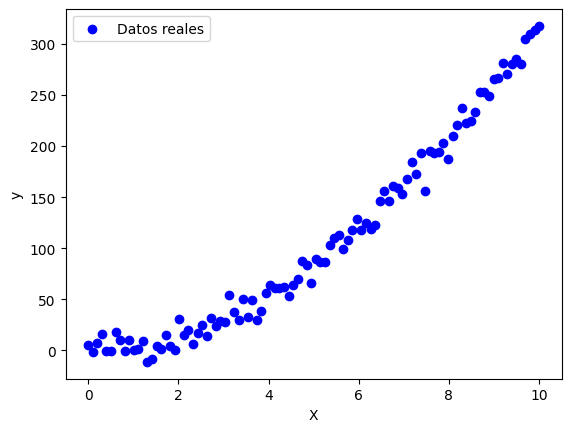

Error de Regresión Lineal: 544.1736611263539
Error de Regresión Polinómica: 61.96330450394994
Error de Regresión con arbol de decisión: 135.2008472515694


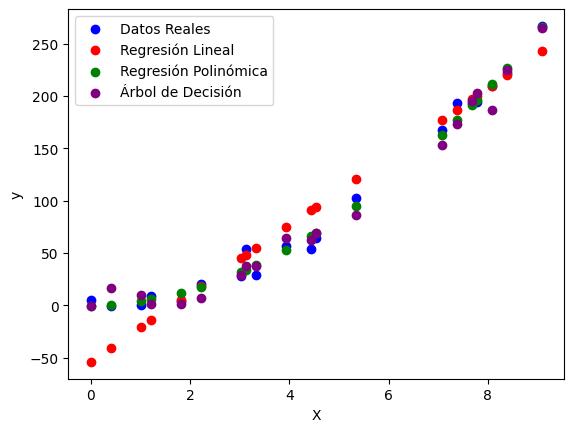

El mejor modelo es: Regresión Polinómica


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Generar datos sintéticos.
np.random.seed(42) # semilla para que cada vez que se ejecute no se cambien los datos
X = np.linspace(0,10,100).reshape(-1,1)
y = 3* X**2 + 2 *X + np.random.randn(100,1) *10

plt.scatter(X, y, color="blue", label="Datos reales")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
#train_test_split: Divide los datos en 80% entrenamiento y 20% prueba.
#test_size=0.2: Define el 20% de los datos como conjunto de prueba.
#random_state=42: Asegura que la división sea reproducible.

#Aplicación de difrentes modelos de regresión.
#regresión Lineal
# 4. Crear el modelo
lin_reg = LinearRegression()
#Entrenar el modelo con los datos de entrenamiento
lin_reg.fit(X_train, y_train)

# Predecir con el modelo #Aplicar lo aprendido a datos nuevos para estimar los resultados.

y_pred_lin = lin_reg.predict(X_test) #Predice valores usando el conjunto de prueba
error_lin = mean_squared_error(y_test, y_pred_lin) #Calcula el error cuadrático medio del modelo.
print(f"Error de Regresión Lineal: {error_lin}")

#Aplicación de difrentes modelos de regresión
#Regresión Polinómica
poly_features = PolynomialFeatures(degree=2) #Convierte X en características polinómicas de segundo grado.
X_train_poly = poly_features.fit_transform(X_train) #Ajusta y transforma los datos de entrenamiento.

X_test_poly = poly_features.transform(X_test) #Transforma los datos de prueba con la misma escala.

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
error_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Error de Regresión Polinómica: {error_poly}")

#Arbol de Decisión
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
error_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Error de Regresión con arbol de decisión: {error_tree}")

#Comparación de modelos
plt.scatter(X_test, y_test, color="blue", label="Datos Reales")
plt.scatter(X_test, y_pred_lin, color="red", label="Regresión Lineal")
plt.scatter(X_test, y_pred_poly, color="green", label="Regresión Polinómica")
plt.scatter(X_test, y_pred_tree, color="purple", label="Árbol de Decisión")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#Seleccioón del mejor modelo
errores={ "Regresión lineal": error_lin,
          "Regresión Polinómica": error_poly,
          "Árbol de Decisión": error_tree
          }
mejor_modelo = min(errores, key=errores.get)
print(f"El mejor modelo es: {mejor_modelo}")

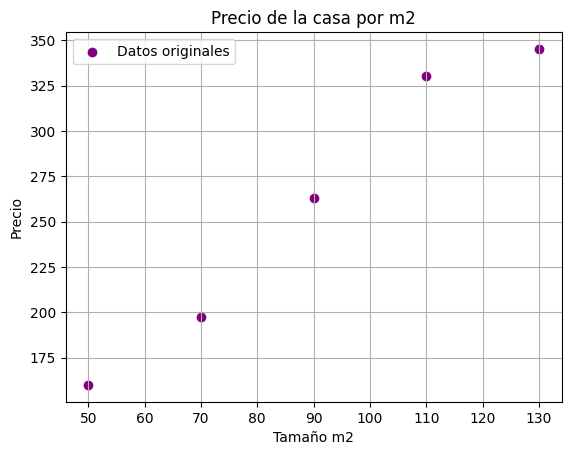

Intercepto: 32.38
Pendiente: 2.52
MSE: 160.19
R2: 0.97


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.array([50, 70, 90, 110, 130]).reshape(-1, 1)
y = np.array([150, 200, 250, 300, 350]) + np.random.normal(0, 20, 5)

plt.scatter(X, y, color = 'purple', label = 'Datos originales')
plt.xlabel('Tamaño m2')
plt.ylabel('Precio')
plt.title('Precio de la casa por m2')
plt.legend()
plt.grid()
plt.show()

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
intercepto = model.intercept_
pendiente = model.coef_[0]
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Intercepto: {intercepto:.2f}')
print(f'Pendiente: {pendiente:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

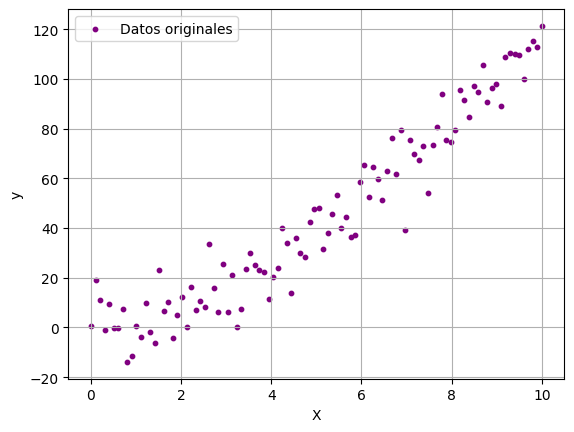

LinearRegression: MSE=143, R2=  1
PolynomialFeature: MSE=84, R2=  1
DecisionTreeRegressor: MSE=218, R2=  1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + X**2 + 2*X + np.random.randn(100, 1)*10

plt.scatter(X, y, color = 'purple', s = 10, label = 'Datos originales')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

trr = DecisionTreeRegressor(random_state = 42)
trr.fit(X_train, y_train)
y_pred_trr = trr.predict(X_test)
mse_trr = mean_squared_error(y_test, y_pred_trr)
r2_trr = r2_score(y_test, y_pred_trr)

print('LinearRegression: MSE=%2.f, R2=%3.f' % (mse_lin, r2_lin))
print('PolynomialFeature: MSE=%2.f, R2=%3.f' % (mse_poly, r2_poly))
print('DecisionTreeRegressor: MSE=%2.f, R2=%3.f' % (mse_trr, r2_trr))

##**LabelEnconder y OneHotEncoder**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

data = {'Producto': ['Camisa', 'Pantalon', None, 'Zapatos', 'Camisa'],
        'Color': ['Rojo', 'Azul', 'verde', 'rojo', 'ROJO'],
        'Tamaño': ['S', 'L', 'M', None, 'S'],
        'Precio': [100, 200, 150, np.nan, 100]
        }

df = pd.DataFrame(data)
df.head()

,Producto,Color,Tamaño,Precio
0,Camisa,Rojo,S,100.0
1,Pantalon,Azul,L,200.0
2,None,verde,M,150.0
3,Zapatos,rojo,None,NaN
4,Camisa,ROJO,S,100.0


df_sin_nulos = df.dropna()
df_sin_nulos

In [2]:
df_sin_nulos = df.dropna()
df_sin_nulos

,Producto,Color,Tamaño,Precio
0,Camisa,Rojo,S,100.0
1,Pantalon,Azul,L,200.0
4,Camisa,ROJO,S,100.0


In [3]:
df_sin_nulos['Color'] = df_sin_nulos['Color'].str.lower()
df_sin_nulos

/tmp/ipython-input-784639484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Color'] = df_sin_nulos['Color'].str.lower()


,Producto,Color,Tamaño,Precio
0,Camisa,rojo,S,100.0
1,Pantalon,azul,L,200.0
4,Camisa,rojo,S,100.0


In [4]:
le = LabelEncoder()

df_sin_nulos['Tamaño_le'] = le.fit_transform(df_sin_nulos['Tamaño'])
df_sin_nulos #la asignacion es alfabetica

/tmp/ipython-input-287345905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Tamaño_le'] = le.fit_transform(df_sin_nulos['Tamaño'])


,Producto,Color,Tamaño,Precio,Tamaño_le
0,Camisa,rojo,S,100.0,1
1,Pantalon,azul,L,200.0,0
4,Camisa,rojo,S,100.0,1


In [5]:
ohe = OneHotEncoder()

color_encoded = ohe.fit_transform(df_sin_nulos[["Color"]]).toarray()
color_encoded

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

np.random.seed(42)

X = np.random.normal(0, 10, 100).reshape(-1, 1)
y = 3*X**2 + 2*X - X**3 + np.random.randn(100, 1) * 10
y = y.ravel()

poly = PolynomialFeatures(degree = 5, include_bias = False)
#include_bias controla la inclusion de una columna unitario de intercepto
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_search = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

print('Mejor alpha: ', ridge_search.best_params_['alpha'])

Mejor alpha:  0.001


In [19]:
lasso = Lasso(max_iter = 10000)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

lasso_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

print('Mejor alpha: ', lasso_search.best_params_['alpha'])

Mejor alpha:  0.0001


##Actividad Clase Sesión 4

/tmp/ipython-input-765238196.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


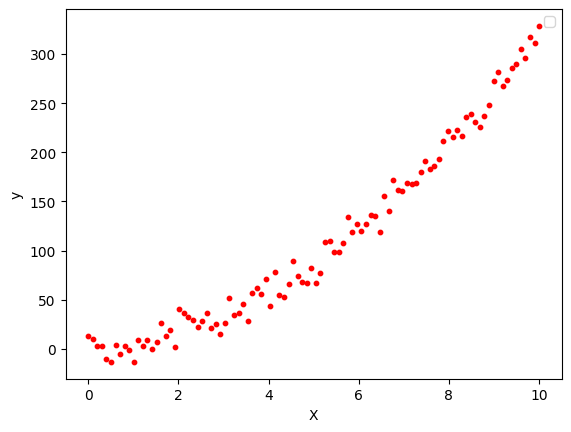

Lineal: MSE=475.35, R2=0.940
Polinomio: MSE=118.12, R2=0.985
Arbol: MSE=146.93, R2=0.982
Ridge MSE Promedio (Neg): -114.25510959953658
Lasso MSE Promedio (Neg): -114.29592857990231
Mejor alpha: {'ridge__alpha': 0.01}
Mejor score (Neg MSE): -114.33404266052291


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X**2+2*X+np.random.randn(100,1)*10
plt.scatter(X, y, color="red", s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)
# Modelo Lineal
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Modelo Polinomio (Grado 2)
poli = PolynomialFeatures(degree=2)
X_train_poli= poli.fit_transform(X_train)
X_test_poli = poli.fit_transform(X_test)
poli_reg = LinearRegression()
poli_reg.fit(X_train_poli, y_train)
y_pred_poli = poli_reg.predict(X_test_poli)
mse_poli = mean_squared_error(y_test, y_pred_poli)
r2_poli = r2_score(y_test, y_pred_poli)


# Modelo Árbol
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_poli_tree = mean_squared_error(y_test, y_pred_tree)
r2_poli_tree = r2_score(y_test, y_pred_tree)

print("Lineal: MSE=%.2f, R2=%.3f" % (mse_lin, r2_lin))
print("Polinomio: MSE=%.2f, R2=%.3f" % (mse_poli, r2_poli))
print("Arbol: MSE=%.2f, R2=%.3f" % (mse_poli_tree, r2_poli_tree))


# Ridge y Lasso de Librería ScikiLearn (Modelo de Regresión Lineal pero que tienen penalización)

ridge = Ridge(alpha=1.0)
score_ridge = cross_val_score(ridge, X_train_poli, y_train.ravel(), cv=5, scoring="neg_mean_squared_error")

lasso = Lasso(alpha=0.1, max_iter= 10000)
score_lasso = cross_val_score(lasso, X_train_poli, y_train.ravel(), cv=5, scoring="neg_mean_squared_error")

print("Ridge MSE Promedio (Neg):", np.mean(score_ridge))
print("Lasso MSE Promedio (Neg):", np.mean(score_lasso))

# Pipeline
pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("ridge", Ridge())
])

param_grid = {"ridge__alpha":[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train_poli, y_train.ravel())
print("Mejor alpha:", grid.best_params_)
print("Mejor score (Neg MSE):", grid.best_score_)


##Codificación Variables categóricas

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

data={'Producto':['camisa','pantalon',None,'zapatos','camisa','camisa'],
      'Precio':[20,40,30,None,20,25],
      'Color':['rojo','azul','verde','azul','rojo','rojo']}

df=pd.DataFrame(data)
print(df)

print('----------')

df_limpio=df.dropna()
print(df_limpio)

print('----------')

df_limpio=df_limpio.drop_duplicates()
print(df_limpio)

print('----------')

df_limpio=df_limpio.reset_index(drop=True)
print(df_limpio)

print('----------')

le=LabelEncoder()
df_limpio['Producto_Enconder']=le.fit_transform(df_limpio['Producto'])
print(df_limpio)

print('----------')

print(f'Mapeo del LabelEnconder para Producto:{list(le.classes_)}')

print('----------')

df_encoded=pd.get_dummies(df_limpio, columns=['Color'],prefix='Color')
print(df_encoded)


   Producto  Precio  Color
0    camisa    20.0   rojo
1  pantalon    40.0   azul
2      None    30.0  verde
3   zapatos     NaN   azul
4    camisa    20.0   rojo
5    camisa    25.0   rojo
----------
   Producto  Precio Color
0    camisa    20.0  rojo
1  pantalon    40.0  azul
4    camisa    20.0  rojo
5    camisa    25.0  rojo
----------
   Producto  Precio Color
0    camisa    20.0  rojo
1  pantalon    40.0  azul
5    camisa    25.0  rojo
----------
   Producto  Precio Color
0    camisa    20.0  rojo
1  pantalon    40.0  azul
2    camisa    25.0  rojo
----------
   Producto  Precio Color  Producto_Enconder
0    camisa    20.0  rojo                  0
1  pantalon    40.0  azul                  1
2    camisa    25.0  rojo                  0
----------
Mapeo del LabelEnconder para Producto:['camisa', 'pantalon']
----------
   Producto  Precio  Producto_Enconder  Color_azul  Color_rojo
0    camisa    20.0                  0       False        True
1  pantalon    40.0                  1  

 mse_lin : 544.1736611263539
rmse_lin : 23.327530112001867
  r2_lin : 0.9300749237836621
 mae_lin : 17.615933890106316
Metricas polinomio grado 2: {'mse': 61.96330450394987, 'rmse': 7.871677362795675, 'r2': 0.992037856479333, 'mae': 6.006414772521426}
Metricas polinomio grado 3: {'mse': 60.224716189603804, 'rmse': 7.760458503825905, 'r2': 0.9922612611184657, 'mae': 5.831036288398776}
  - Profundidad 1: {'mse': 1201.169014278701, 'rmse': 34.6578853116964, 'r2': 0.8456525170691067, 'mae': 30.284006337120523}
  - Profundidad 3: {'mse': 245.1465485889819, 'rmse': 15.657156465622418, 'r2': 0.9684992267748209, 'mae': 12.630936499332877}
  - Profundidad 5: {'mse': 95.16288791501441, 'rmse': 9.755146739799171, 'r2': 0.9877717856159174, 'mae': 8.055268763160633}
  - Profundidad 10: {'mse': 135.2008472515694, 'rmse': 11.62758991586689, 'r2': 0.9826269990190056, 'mae': 9.77521749249749}
              Modelo          MSE       RMSE        R2        MAE
0              Poly3    60.224716   7.760459 

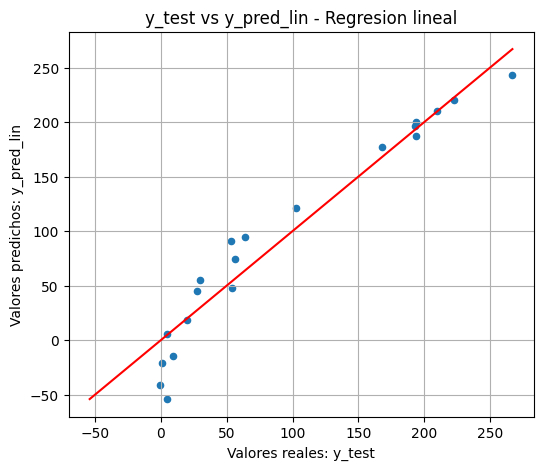

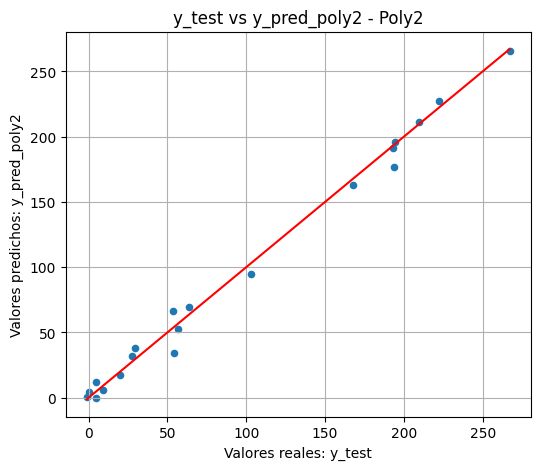

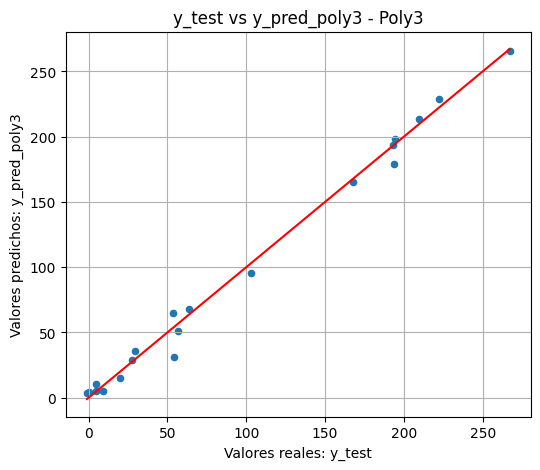

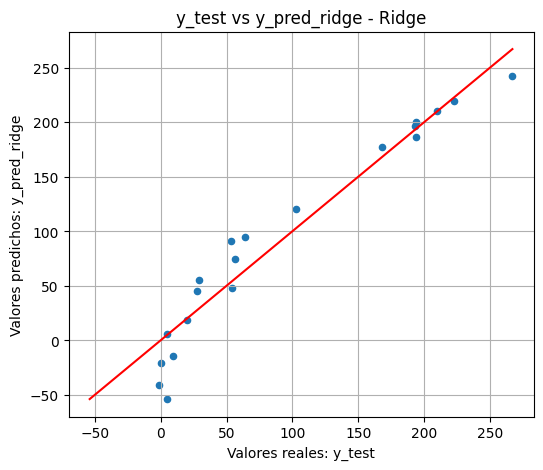

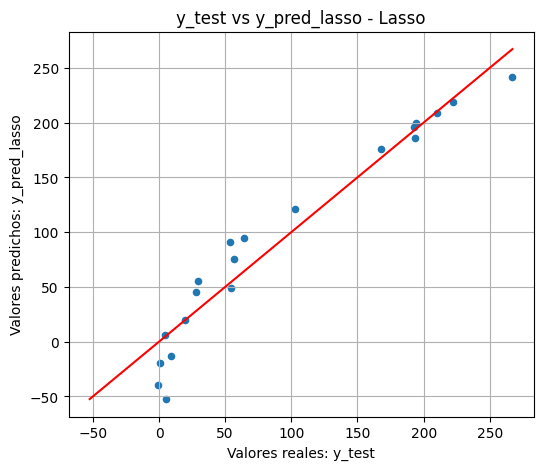

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import math

np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**2 + 2*X + np.random.randn(100, 1) * 10
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regresion lineal con Pipeline
lin_pipe = Pipeline([('scaler', StandardScaler()), ('lr',LinearRegression())])

lin_pipe.fit(X_train, y_train)

y_pred_lin = lin_pipe.predict(X_test)

mse_lin  = mean_squared_error(y_test, y_pred_lin)
rmse_lin = math.sqrt(mse_lin)
r2_lin   = r2_score(y_test, y_pred_lin)
mae_lin  = mean_absolute_error(y_test, y_pred_lin)

print(f" mse_lin : {mse_lin}")
print(f"rmse_lin : {rmse_lin}")
print(f"  r2_lin : {r2_lin}")
print(f" mae_lin : {mae_lin}")

# Regresion polinomica grado 2
poly2_pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()), ('lr',LinearRegression())])
poly2_pipe.fit(X_train, y_train)
y_pred_poly2 = poly2_pipe.predict(X_test)


# Regresion polinomica grado 3
poly3_pipe = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), ('scaler', StandardScaler()), ('lr',LinearRegression())])
poly3_pipe.fit(X_train, y_train)
y_pred_poly3 = poly3_pipe.predict(X_test)

def calcular_metricas(y_true, y_pred):

  mse = mean_squared_error(y_true, y_pred)

  return {
      "mse": mse,
      "rmse": math.sqrt(mse),
      "r2": r2_score(y_true, y_pred),
      "mae": mean_absolute_error(y_true, y_pred)
    }

metricas_poly2 = calcular_metricas(y_test, y_pred_poly2)
metricas_poly3 = calcular_metricas(y_test, y_pred_poly3)

print(f"Metricas polinomio grado 2: {metricas_poly2}")
print(f"Metricas polinomio grado 3: {metricas_poly3}")

depths = [1, 3, 5, 10]

tree_models = {}
tree_metrics = {}

for depth in depths:
    modelo_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    modelo_tree.fit(X_train, y_train)
    y_pred = modelo_tree.predict(X_test)
    tree_models[depth] = modelo_tree
    tree_metrics[depth] = calcular_metricas(y_test, y_pred)

for d, m in tree_metrics.items():
    print(f"  - Profundidad {d}: {m}")

# Ridge regularizacion L2

ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_param_grid ={'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train, y_train)

best_ridge = ridge_search.best_estimator_
alpha_ridge = ridge_search.best_params_['ridge__alpha']

y_pred_ridge = best_ridge.predict(X_test)

metricas_ridge = calcular_metricas(y_test, y_pred_ridge)

# Lasso regularizacion L2

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
lasso_param_grid ={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_search = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train, y_train)

best_lasso = lasso_search.best_estimator_
alpha_lasso = lasso_search.best_params_['lasso__alpha']

y_pred_lasso = best_lasso.predict(X_test)

metricas_lasso = calcular_metricas(y_test, y_pred_lasso)

rows = []
rows.append(('Linear', ) + tuple([metrics:=calcular_metricas(y_test, y_pred_lin)[k] for k in ['mse', 'rmse', 'r2', 'mae']]))
rows.append(('Poly2', metricas_poly2['mse'], metricas_poly2['rmse'], metricas_poly2['r2'], metricas_poly2['mae']))
rows.append(('Poly3', metricas_poly3['mse'], metricas_poly3['rmse'], metricas_poly3['r2'], metricas_poly3['mae']))


for depth in depths:
  m = tree_metrics[depth]
  rows.append((f'Tree_{depth}', m['mse'], m['rmse'], m['r2'], m['mae']))

rows.append((f'Ridge (alpha={alpha_ridge})', metricas_ridge['mse'], metricas_ridge['rmse'], metricas_ridge['r2'], metricas_ridge['mae']))
rows.append((f'Lasso (alpha={alpha_lasso})', metricas_lasso['mse'], metricas_lasso['rmse'], metricas_lasso['r2'], metricas_lasso['mae']))

df_metricas = pd.DataFrame(rows, columns=['Modelo', 'MSE', 'RMSE', 'R2', 'MAE']).sort_values(by='MSE').reset_index(drop=True)
print(df_metricas)

# graficos
# modelo de regresion lineal

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lin, s=20)
mn = min(y_test.min(), y_pred_lin.min())
mx = max(y_test.max(), y_pred_lin.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_lin')
plt.title('y_test vs y_pred_lin - Regresion lineal')
plt.grid(True)

# modelo polinomico de grado 2

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly2, s=20)
mn = min(y_test.min(), y_pred_poly2.min())
mx = max(y_test.max(), y_pred_poly2.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_poly2')
plt.title('y_test vs y_pred_poly2 - Poly2')
plt.grid(True)

# modelo polinomico de grado 2

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly3, s=20)
mn = min(y_test.min(), y_pred_poly3.min())
mx = max(y_test.max(), y_pred_poly3.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_poly3')
plt.title('y_test vs y_pred_poly3 - Poly3')
plt.grid(True)

# modelo de ridge

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ridge, s=20)
mn = min(y_test.min(), y_pred_ridge.min())
mx = max(y_test.max(), y_pred_ridge.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_ridge')
plt.title('y_test vs y_pred_ridge - Ridge')
plt.grid(True)

# modelo de lasso

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lasso, s=20)
mn = min(y_test.min(), y_pred_lasso.min())
mx = max(y_test.max(), y_pred_lasso.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_lasso')
plt.title('y_test vs y_pred_lasso - Lasso')
plt.grid(True)

plt.show()

##Ejercicio Comparación modelos (lineales, polinómicos, arboles y regresión)

 mse_lin : 544.1736611263539
rmse_lin : 23.327530112001867
  r2_lin : 0.9300749237836621
 mae_lin : 17.615933890106316
Metricas polinomio grado 2: {'mse': 61.96330450394987, 'rmse': 7.871677362795675, 'r2': 0.992037856479333, 'mae': 6.006414772521426}
Metricas polinomio grado 3: {'mse': 60.224716189603804, 'rmse': 7.760458503825905, 'r2': 0.9922612611184657, 'mae': 5.831036288398776}
  - Profundidad 1: {'mse': 1201.169014278701, 'rmse': 34.6578853116964, 'r2': 0.8456525170691067, 'mae': 30.284006337120523}
  - Profundidad 3: {'mse': 245.1465485889819, 'rmse': 15.657156465622418, 'r2': 0.9684992267748209, 'mae': 12.630936499332877}
  - Profundidad 5: {'mse': 95.16288791501441, 'rmse': 9.755146739799171, 'r2': 0.9877717856159174, 'mae': 8.055268763160633}
  - Profundidad 10: {'mse': 135.2008472515694, 'rmse': 11.62758991586689, 'r2': 0.9826269990190056, 'mae': 9.77521749249749}
              Modelo          MSE       RMSE        R2        MAE
0              Poly3    60.224716   7.760459 

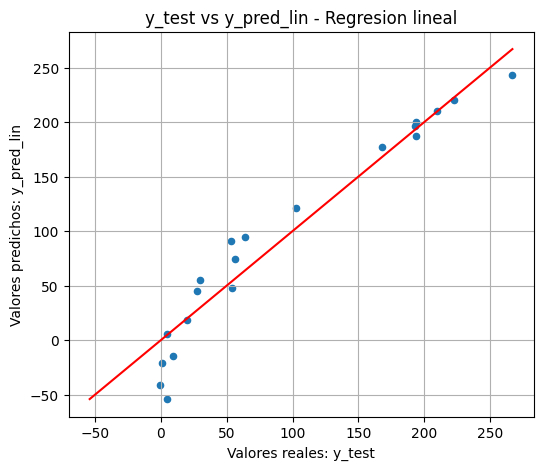

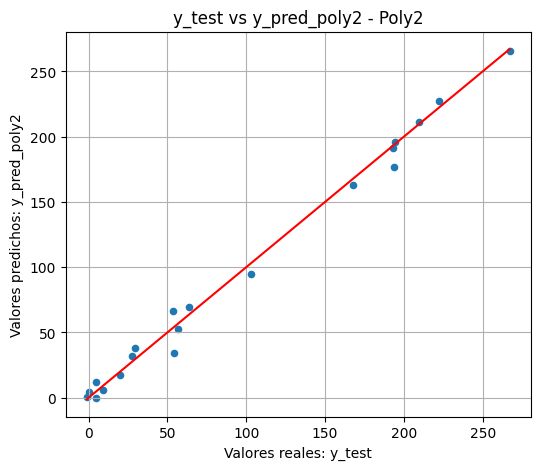

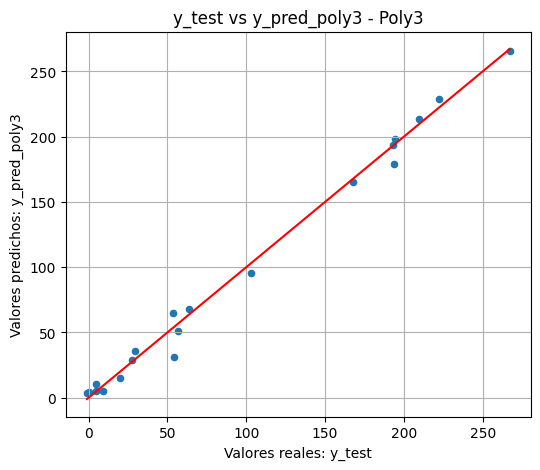

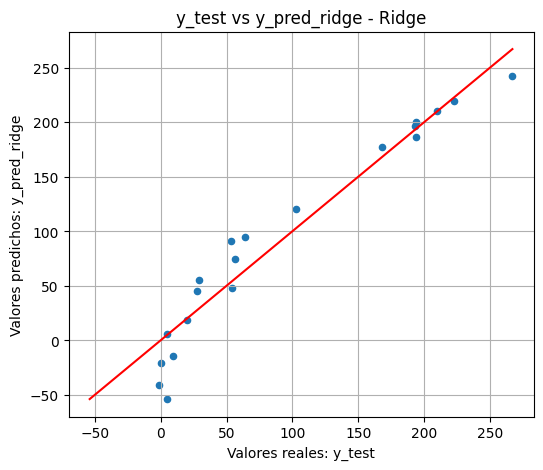

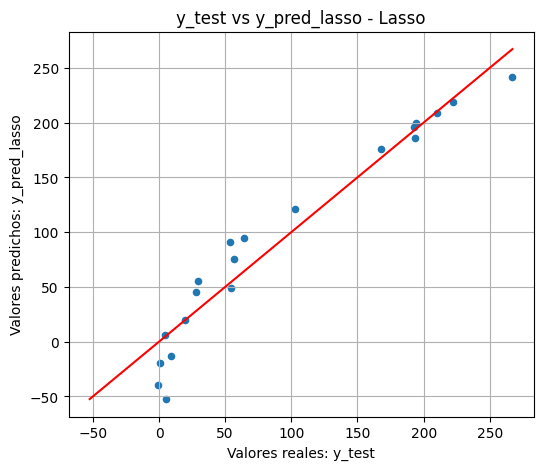

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import math

np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**2 + 2*X + np.random.randn(100, 1) * 10
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regresion lineal con Pipeline
lin_pipe = Pipeline([('scaler', StandardScaler()), ('lr',LinearRegression())])

lin_pipe.fit(X_train, y_train)

y_pred_lin = lin_pipe.predict(X_test)

mse_lin  = mean_squared_error(y_test, y_pred_lin)
rmse_lin = math.sqrt(mse_lin)
r2_lin   = r2_score(y_test, y_pred_lin)
mae_lin  = mean_absolute_error(y_test, y_pred_lin)

print(f" mse_lin : {mse_lin}")
print(f"rmse_lin : {rmse_lin}")
print(f"  r2_lin : {r2_lin}")
print(f" mae_lin : {mae_lin}")

# Regresion polinomica grado 2
poly2_pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()), ('lr',LinearRegression())])
poly2_pipe.fit(X_train, y_train)
y_pred_poly2 = poly2_pipe.predict(X_test)


# Regresion polinomica grado 3
poly3_pipe = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), ('scaler', StandardScaler()), ('lr',LinearRegression())])
poly3_pipe.fit(X_train, y_train)
y_pred_poly3 = poly3_pipe.predict(X_test)

def calcular_metricas(y_true, y_pred):

  mse = mean_squared_error(y_true, y_pred)

  return {
      "mse": mse,
      "rmse": math.sqrt(mse),
      "r2": r2_score(y_true, y_pred),
      "mae": mean_absolute_error(y_true, y_pred)
    }

metricas_poly2 = calcular_metricas(y_test, y_pred_poly2)
metricas_poly3 = calcular_metricas(y_test, y_pred_poly3)

print(f"Metricas polinomio grado 2: {metricas_poly2}")
print(f"Metricas polinomio grado 3: {metricas_poly3}")

depths = [1, 3, 5, 10]

tree_models = {}
tree_metrics = {}

for depth in depths:
    modelo_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    modelo_tree.fit(X_train, y_train)
    y_pred = modelo_tree.predict(X_test)
    tree_models[depth] = modelo_tree
    tree_metrics[depth] = calcular_metricas(y_test, y_pred)

for d, m in tree_metrics.items():
    print(f"  - Profundidad {d}: {m}")

# Ridge regularizacion L2

ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_param_grid ={'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train, y_train)

best_ridge = ridge_search.best_estimator_
alpha_ridge = ridge_search.best_params_['ridge__alpha']

y_pred_ridge = best_ridge.predict(X_test)

metricas_ridge = calcular_metricas(y_test, y_pred_ridge)

# Lasso regularizacion L2

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
lasso_param_grid ={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_search = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train, y_train)

best_lasso = lasso_search.best_estimator_
alpha_lasso = lasso_search.best_params_['lasso__alpha']

y_pred_lasso = best_lasso.predict(X_test)

metricas_lasso = calcular_metricas(y_test, y_pred_lasso)

rows = []
rows.append(('Linear', ) + tuple([metrics:=calcular_metricas(y_test, y_pred_lin)[k] for k in ['mse', 'rmse', 'r2', 'mae']]))
rows.append(('Poly2', metricas_poly2['mse'], metricas_poly2['rmse'], metricas_poly2['r2'], metricas_poly2['mae']))
rows.append(('Poly3', metricas_poly3['mse'], metricas_poly3['rmse'], metricas_poly3['r2'], metricas_poly3['mae']))


for depth in depths:
  m = tree_metrics[depth]
  rows.append((f'Tree_{depth}', m['mse'], m['rmse'], m['r2'], m['mae']))

rows.append((f'Ridge (alpha={alpha_ridge})', metricas_ridge['mse'], metricas_ridge['rmse'], metricas_ridge['r2'], metricas_ridge['mae']))
rows.append((f'Lasso (alpha={alpha_lasso})', metricas_lasso['mse'], metricas_lasso['rmse'], metricas_lasso['r2'], metricas_lasso['mae']))

df_metricas = pd.DataFrame(rows, columns=['Modelo', 'MSE', 'RMSE', 'R2', 'MAE']).sort_values(by='MSE').reset_index(drop=True)
print(df_metricas)

# graficos
# modelo de regresion lineal

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lin, s=20)
mn = min(y_test.min(), y_pred_lin.min())
mx = max(y_test.max(), y_pred_lin.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_lin')
plt.title('y_test vs y_pred_lin - Regresion lineal')
plt.grid(True)

# modelo polinomico de grado 2

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly2, s=20)
mn = min(y_test.min(), y_pred_poly2.min())
mx = max(y_test.max(), y_pred_poly2.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_poly2')
plt.title('y_test vs y_pred_poly2 - Poly2')
plt.grid(True)

# modelo polinomico de grado 2

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly3, s=20)
mn = min(y_test.min(), y_pred_poly3.min())
mx = max(y_test.max(), y_pred_poly3.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_poly3')
plt.title('y_test vs y_pred_poly3 - Poly3')
plt.grid(True)

# modelo de ridge

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ridge, s=20)
mn = min(y_test.min(), y_pred_ridge.min())
mx = max(y_test.max(), y_pred_ridge.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_ridge')
plt.title('y_test vs y_pred_ridge - Ridge')
plt.grid(True)

# modelo de lasso

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lasso, s=20)
mn = min(y_test.min(), y_pred_lasso.min())
mx = max(y_test.max(), y_pred_lasso.max())
plt.plot([mn, mx], [mn, mx], color='red')
plt.xlabel('Valores reales: y_test')
plt.ylabel('Valores predichos: y_pred_lasso')
plt.title('y_test vs y_pred_lasso - Lasso')
plt.grid(True)

plt.show()

##Ejercicio Modelos de regularización (Ridge y Lasso)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X - X**3 + np.random.randn(100, 1) * 10
y = y.ravel()

poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge = Ridge()
param_grid ={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

print('Mejor Alpha {ridge}:', ridge_search.best_params_['alpha'])
best_ridge = ridge_search.best_estimator_

lasso = Lasso(max_iter=1000)
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

print('Mejor Alpha {lasso}:', lasso_search.best_params_['alpha'])
best_lasso = lasso_search.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

for name, y_pred in [('Ridge', y_pred_ridge), ('Lasso', y_pred_lasso)]:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}')
    print(f'{name} R2: {r2:.2f}')

Mejor Alpha {ridge}: 100
Mejor Alpha {lasso}: 1
Ridge MSE: 60.55
Ridge R2: 1.00
Lasso MSE: 63.85
Lasso R2: 1.00


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.158e+03, tolerance: 2.535e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e+03, tolerance: 2.765e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.170e+03, tolerance: 2.689e